In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import  BaggingRegressor

Загружаем данные

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Разделяем на тренировочные и тестовые данные

data_train, data_test, y_train, y_test = train_test_split(data.drop(columns='SalePrice'), data['SalePrice'], test_size=0.30, random_state=42)

In [5]:
#Находим категориальные признаки

categorials = list(data.dtypes[data.dtypes == object].index)

categorials_nunique = data_train[categorials].nunique()

#закодируем пропущенные значений строкой, факт пропущенного значения тоже может нести в себе информацию
data[categorials] = data[categorials].fillna('nan')

In [6]:
#отфильтруем непрерывные признаки
integer = [f for f in data if f not in (categorials + ['ID', 'SalePrice'])]

In [7]:
# Создаем дамми-переменные для категорий
dummy_train = pd.get_dummies(data_train[categorials], columns=categorials)
dummy_test = pd.get_dummies(data_test[categorials], columns=categorials)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train = pd.concat([data_train[integer].fillna(-999), dummy_train], axis=1)

X_test = pd.concat([data_test[integer].fillna(-999), dummy_test], axis=1)

In [8]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Neighborhood_SWISU,Neighborhood_Somerst,KitchenQual_TA,RoofStyle_Hip,FireplaceQu_Fa,MasVnrType_Stone,Functional_Maj1,HouseStyle_SLvl,Neighborhood_NWAmes,Exterior2nd_HdBoard
135,136,20,80.0,10400,7,6,1970,1970,288.0,0,...,0,0,1,1,0,0,0,0,1,0
1452,1453,180,35.0,3675,5,5,2005,2005,80.0,547,...,0,0,1,0,0,0,0,1,0,0
762,763,60,72.0,8640,7,5,2009,2009,0.0,24,...,0,1,0,0,0,0,0,0,0,0
932,933,20,84.0,11670,9,5,2006,2006,302.0,0,...,0,1,0,1,0,1,0,0,0,0
435,436,60,43.0,10667,7,6,1996,1996,0.0,385,...,0,0,0,0,0,0,0,0,0,0


Задание 2. Построить случайный лес, вывести важность признаков

In [9]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [10]:
dt.score(X_test, y_test)

0.7782191884305074

In [11]:
bagging = BaggingRegressor(DecisionTreeRegressor(), max_samples=0.5, max_features=0.5)

In [12]:
bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_features=0.5,
                 max_samples=0.5)

In [13]:
bagging.score(X_train, y_train)

0.9315303882714282

In [14]:
bagging.score(X_test, y_test)

0.8778507793605147

In [15]:
kn = KNeighborsRegressor()
kn.fit(X_train, y_train)
kn.score(X_train, y_train)

0.7419951520813983

In [16]:
kn.score(X_test, y_test)

0.6775304068635524

In [17]:
bagging = BaggingRegressor(KNeighborsRegressor(), max_samples=0.5, max_features=0.5, n_estimators=100)

In [18]:
bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(), max_features=0.5,
                 max_samples=0.5, n_estimators=100)

In [19]:
bagging.score(X_train, y_train)

0.723935284477333

In [20]:
bagging.score(X_test, y_test)

0.6928092017902936

In [21]:
# Создаем модель RandomForest
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
# проверяем полученные данные на тренировочных данных

clf_rf.score(X_train, y_train)

0.9782821463534515

In [23]:
# проверяем полученные данные на тестовых данных

clf_rf.score(X_test, y_test)

#Модель получилась не много переобученной

0.8960611600352071

In [24]:
# Выявляем наиболее важные признаки и выводим на график. Большое значение имеет признак Overall Qual, остальные почти равны нулю

imp = pd.Series(clf_rf.feature_importances_)

In [25]:
imp.index = pd.Series(X_train.columns)

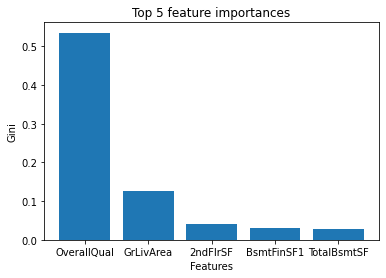

In [26]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.sort_values(ascending=False).head().index, imp.sort_values(ascending=False).head())
plt.show()

3. Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную

In [27]:
# Создаем стэккинг и обучаем его на наших данных 

Regressor = StackingRegressor(
    [
        ('LinearRegression', LinearRegression()),
        ('KNeighborsRegressor', KNeighborsRegressor()),
        ('DecisionTree', DecisionTreeRegressor())
    ], RidgeCV())

In [28]:
Regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('KNeighborsRegressor', KNeighborsRegressor()),
                              ('DecisionTree', DecisionTreeRegressor())],
                  final_estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))

In [29]:
print(f'Score on train data {Regressor.score(X_train, y_train)}')
print(f'Score on test data {Regressor.score(X_test, y_test)}')

for i in Regressor.named_estimators:
    print(f'Score on train data with model {i} {Regressor.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test data with model {i} {Regressor.named_estimators_[i].score(X_test, y_test)}')

Score on train data 0.935462572481131
Score on test data 0.8650379576780576
Score on train data with model LinearRegression 0.922108540356243
Score on test data with model LinearRegression 0.8533836050579346
Score on train data with model KNeighborsRegressor 0.7419951520813983
Score on test data with model KNeighborsRegressor 0.6775304068635524
Score on train data with model DecisionTree 1.0
Score on test data with model DecisionTree 0.7657494084831866


Лучше всех с задачей справилась линейная регрессия

In [30]:
score_train = {}
score_test = {}

for i in Regressor.named_estimators:
    score_train[i] = Regressor.named_estimators_[i].score(X_train, y_train)
    score_test[i] = Regressor.named_estimators_[i].score(X_test, y_test)

score_train['Total']= Regressor.score(X_train, y_train)
score_test['Total']= Regressor.score(X_test, y_test)

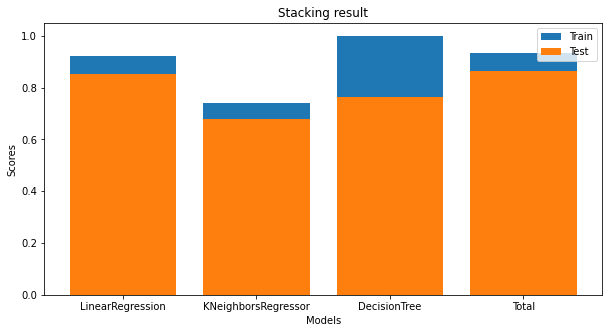

In [31]:
plt.figure(figsize=(10,5))
plt.bar(range(len(score_train)), score_train.values(), align="center", label='Train')
plt.xticks(range(len(score_train)), list(score_train.keys()))
plt.bar(range(len(score_test)), score_test.values(), align="center", label='Test')
plt.xticks(range(len(score_test)), list(score_test.keys()))
plt.autoscale
plt.title('Stacking result')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()